In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Читаем файл
new_data = pd.read_csv('C://data.csv')
new_data.head()

,applicant_name,Age,Ответ на вопрос
0,name_0,49.0,нет
1,name_1,37.0,да
2,name_2,18.0,нет
3,name_3,36.0,неверное решение
4,name_4,31.0,да


In [56]:
# Выводим основную статистику по данным
new_data.describe()

,Age
count,281.000000
mean,26.800712
std,11.999232
min,15.000000
25%,21.000000
50%,24.000000
75%,31.000000
max,186.000000


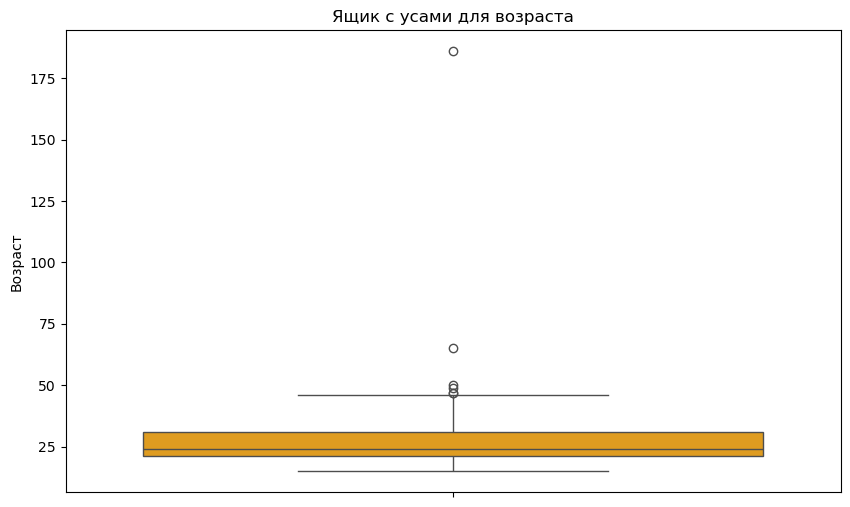

In [14]:
#Строим ящик с усами для возраста
plt.figure(figsize=(10, 6))
sns.boxplot(y=new_data['Age'], color='orange')
plt.title("Ящик с усами для возраста")
plt.ylabel("Возраст")
plt.show()

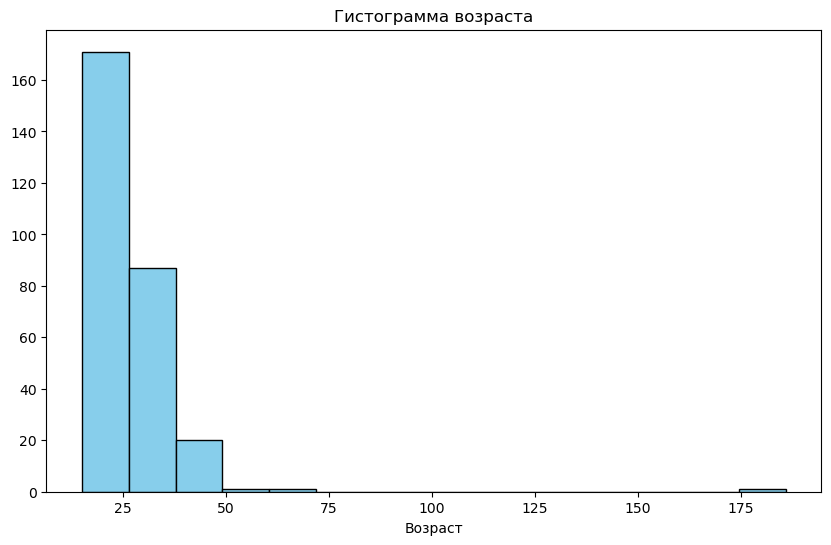

In [33]:
#Строим гистограмму для возраста
plt.figure(figsize=(10, 6))
plt.hist(new_data['Age'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.xlabel("Возраст")
plt.title("Гистограмма возраста")
plt.show()

In [53]:
#Рассчитываем Q1, Q3 и IQR
Q1 = new_data['Age'].quantile(0.25)
Q3 = new_data['Age'].quantile(0.75)
IQR = Q3 - Q1

#Устанавливаем границы для выбросов
lower_bound = round(Q1 - 1.5 * IQR)
upper_bound = round(Q3 + 1.5 * IQR)

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Нижняя граница для выбросов:", lower_bound)
print("Верхняя граница для выбросов:", upper_bound)

Q1: 21.0
Q3: 31.0
IQR: 10.0
Нижняя граница для выбросов: 6
Верхняя граница для выбросов: 46


In [52]:
#Смотрим на выбросы
outliers = new_data[(new_data['Age'] < lower_bound) | (new_data['Age'] > upper_bound)]
outliers

,applicant_name,Age,Ответ на вопрос
0,name_0,49.0,нет
40,name_40,47.0,нет
73,name_73,65.0,да
232,name_232,50.0,нет
277,name_277,47.0,нет
310,name_310,186.0,нет


In [60]:
#Считаю, что 310 строка может изменить конечные данные
new_data1 = new_data.drop(index=310)
print(new_data1)

    applicant_name   Age   Ответ на вопрос
0           name_0  49.0               нет
1           name_1  37.0                да
2           name_2  18.0               нет
3           name_3  36.0  неверное решение
4           name_4  31.0                да
..             ...   ...               ...
320       name_320  19.0               нет
321       name_321  21.0               нет
322       name_322  33.0               нет
323       name_323  22.0                да
324       name_324   NaN                да

[324 rows x 3 columns]


In [61]:
#Проверяем наличие значений NA
new_data1.isna().sum()

applicant_name      0
Age                44
Ответ на вопрос     0
dtype: int64

In [63]:
#Заменяем NA в колонке Age на среднее значение и округляем
new_data1['Age'].fillna(new_data1['Age'].mean(), inplace=True)
new_data1['Age'] = new_data1['Age'].round(0)

print(new_data1)

    applicant_name   Age   Ответ на вопрос
0           name_0  49.0               нет
1           name_1  37.0                да
2           name_2  18.0               нет
3           name_3  36.0  неверное решение
4           name_4  31.0                да
..             ...   ...               ...
320       name_320  19.0               нет
321       name_321  21.0               нет
322       name_322  33.0               нет
323       name_323  22.0                да
324       name_324  26.0                да

[324 rows x 3 columns]


C:\Users\SUGAR-Кунчик\AppData\Local\Temp\ipykernel_14140\981497675.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data1['Age'].fillna(new_data1['Age'].mean(), inplace=True)


In [64]:
#Статистика после очистки данных
new_data1.describe()

,Age
count,324.000000
mean,26.200617
std,6.787796
min,15.000000
25%,21.000000
50%,26.000000
75%,29.000000
max,65.000000


In [68]:
#Основные характеристики данных (по возрасту) без разделения на группы
age_stats = {
    "mean": new_data1["Age"].mean(),
    "median": new_data1["Age"].median(),
    "std_dev": new_data1["Age"].std(),
    "variance": new_data1["Age"].var(),
    "min": new_data1["Age"].min(),
    "max": new_data1["Age"].max(),
    "range": new_data1["Age"].max() - new_data1["Age"].min()
}
age_stats_df = pd.DataFrame([age_stats])
print(age_stats_df)

        mean  median   std_dev   variance   min   max  range
0  26.200617    26.0  6.787796  46.074179  15.0  65.0   50.0


In [85]:
#Основные характеристики данных с разделением по группам "Ответ на вопрос"
grouped_stats = new_data1.groupby('Ответ на вопрос')['Age'].agg(['mean', 'median', 'std', 'var', 'min', 'max'])
grouped_stats

,mean,median,std,var,min,max
Ответ на вопрос,,,,,,
да,27.555556,26.0,6.918143,47.860697,18.0,65.0
"да, но очень плохо описано",23.333333,21.5,5.391351,29.066667,19.0,33.0
неверное решение,32.000000,32.0,4.618802,21.333333,28.0,36.0
нет,25.145251,24.0,6.546387,42.855188,15.0,50.0


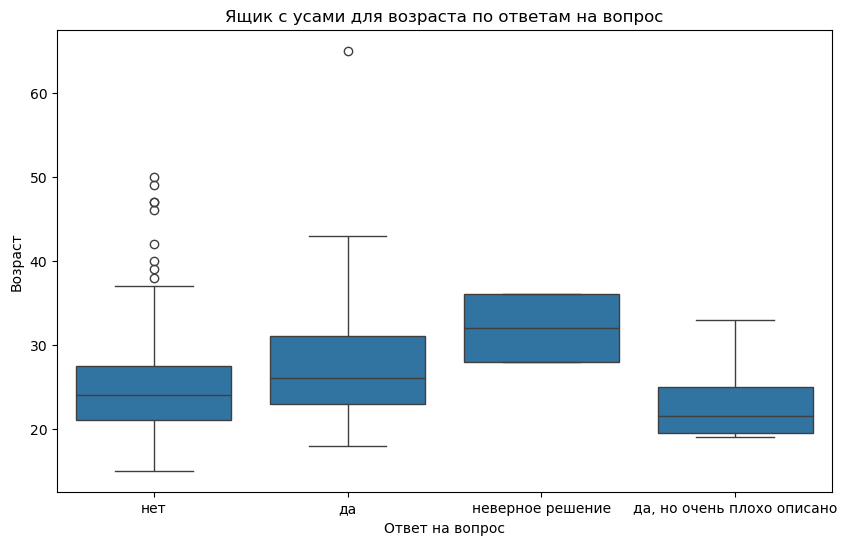

In [89]:
#Строим ящик с усами для возраста в зависимости от "Ответ на вопрос"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ответ на вопрос', y='Age', data=new_data1)
plt.title("Ящик с усами для возраста по ответам на вопрос")
plt.xlabel("Ответ на вопрос")
plt.ylabel("Возраст")
plt.show()

In [93]:
#Рассчитаем средний возраст и доверительные интервалы по каждой группе "Ответ на вопрос"
data_summary = new_data1.groupby('Ответ на вопрос')['Age'].agg(mean_age='mean', sd_age='std', count='count')
confidence = 0.95
data_summary['error_margin'] = data_summary.apply(
    lambda row: t.ppf((1 + confidence) / 2., row['count'] - 1) * row['sd_age'] / np.sqrt(row['count']), axis=1
)
data_summary['ymin'] = data_summary['mean_age'] - data_summary['error_margin']
data_summary['ymax'] = data_summary['mean_age'] + data_summary['error_margin']

print(data_summary)

                             mean_age    sd_age  count  error_margin  \
Ответ на вопрос                                                        
да                          27.555556  6.918143    135      1.177635   
да, но очень плохо описано  23.333333  5.391351      6      5.657876   
неверное решение            32.000000  4.618802      4      7.349545   
нет                         25.145251  6.546387    179      0.965575   

                                 ymin       ymax  
Ответ на вопрос                                   
да                          26.377921  28.733190  
да, но очень плохо описано  17.675457  28.991209  
неверное решение            24.650455  39.349545  
нет                         24.179676  26.110827  


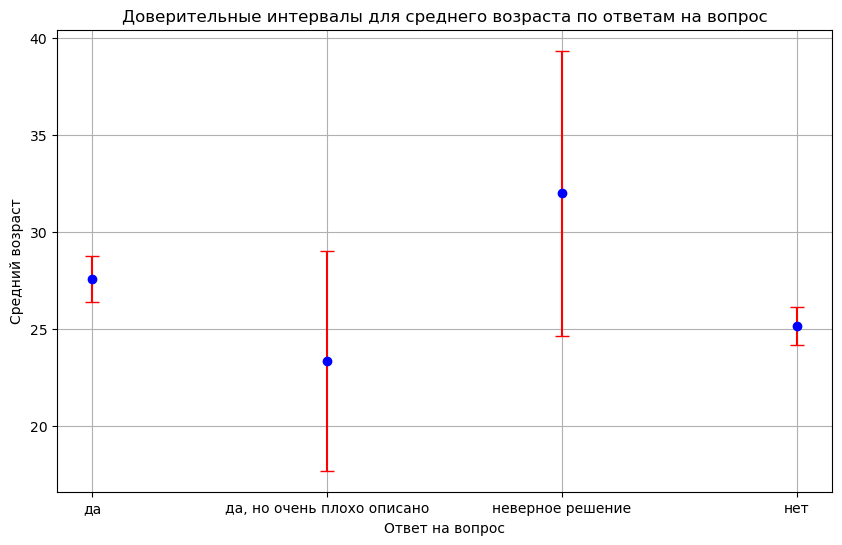

In [92]:
#Строим график с доверительными интервалами
plt.figure(figsize=(10, 6))
plt.errorbar(data_summary.index, data_summary['mean_age'], 
             yerr=data_summary['error_margin'], fmt='o', color='blue', ecolor='red', capsize=5)
plt.title("Доверительные интервалы для среднего возраста по ответам на вопрос")
plt.xlabel("Ответ на вопрос")
plt.ylabel("Средний возраст")
plt.grid(True)
plt.show()